In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
trainset = pd.read_csv('/content/fraudTrain.csv', on_bad_lines='skip')
testset = pd.read_csv('/content/fraudTest.csv')

In [52]:
testset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [53]:
testset.shape

(555719, 23)

In [54]:
trainset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [55]:
trainset.shape

(1296675, 23)

In [56]:
trainset.drop('Unnamed: 0',axis=1,inplace=True)

In [57]:
trainset.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


**Distribution of Fraudulent Transactions**

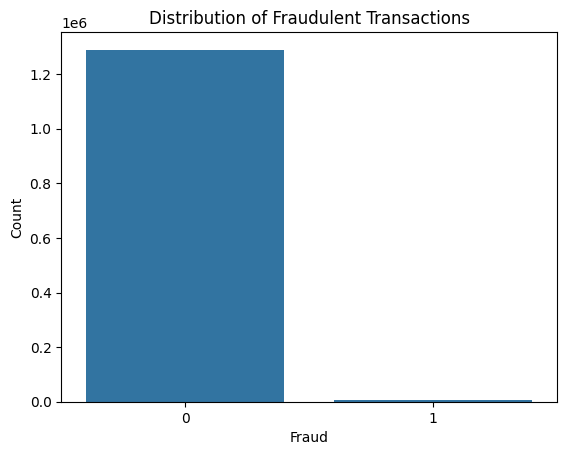

In [58]:
sns.barplot(x=trainset['is_fraud'].value_counts().index, y=trainset['is_fraud'].value_counts().values)

plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')

plt.show()

**Distribution of Fraudulent Transactions on category**

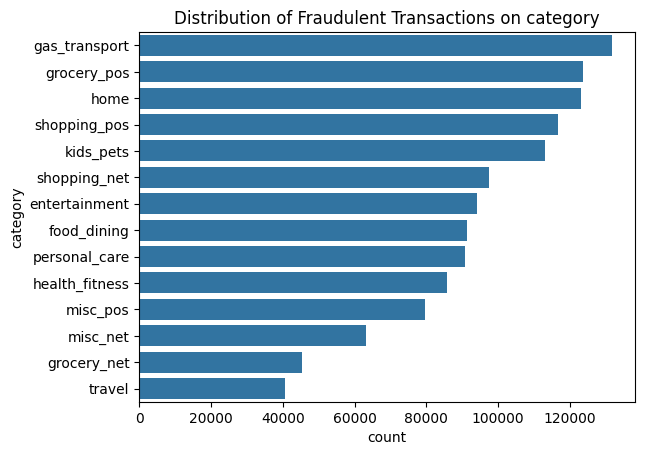

In [59]:
sns.barplot(x=trainset['category'].value_counts().values, y=trainset['category'].value_counts().index)

plt.title('Distribution of Fraudulent Transactions on category')
plt.xlabel('count')
plt.ylabel('category')

plt.show()

**Distribution of Fraudulent Transactions on Gender**

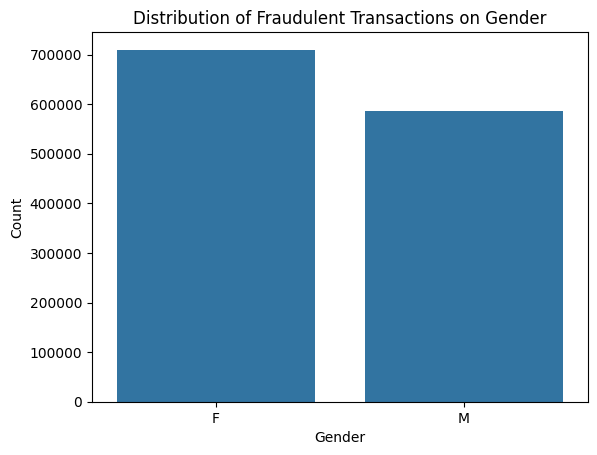

In [60]:
sns.barplot(x=trainset['gender'].value_counts().index, y=trainset['gender'].value_counts().values)

plt.title('Distribution of Fraudulent Transactions on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [61]:
trainset.drop(columns=['trans_date_trans_time','cc_num','first','last','street','job','dob','trans_num','city','zip','merchant','state'],axis=1,inplace=True)

In [62]:
trainset.isnull().sum()

category      0
amt           0
gender        0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [63]:
trainset.dtypes

category       object
amt           float64
gender         object
lat           float64
long          float64
city_pop        int64
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [64]:
trainset.fillna(value=0, inplace=True)

In [65]:
trainset.isnull().sum()

category      0
amt           0
gender        0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [66]:
trainset = pd.get_dummies(trainset, columns=['category'])

In [67]:
trainset.head()

,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,True,...,False,False,False,False,False,False,False,False,False,False
3,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,False,...,False,False,False,False,False,True,False,False,False,False


In [68]:
trainset['gender'] = trainset['gender'].map({'M': 0, 'F': 1})

In [70]:
X = trainset.drop('is_fraud',axis=1)
y = trainset['is_fraud']

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

**LogisticRegression**

In [74]:
from sklearn.linear_model import LogisticRegression

In [76]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_predict=log_model.predict(x_test)

In [81]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00    257811\n           1       0.00      0.00      0.00      1524\n\n    accuracy                           0.99    259335\n   macro avg       0.50      0.50      0.50    259335\nweighted avg       0.99      0.99      0.99    259335\n'

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[257811,      0],
       [  1524,      0]])

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9941234310833478

**Decision Tree Classifier**

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
y_predict=dtc_model.predict(x_test)

In [89]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    257811\n           1       0.66      0.67      0.67      1524\n\n    accuracy                           1.00    259335\n   macro avg       0.83      0.84      0.83    259335\nweighted avg       1.00      1.00      1.00    259335\n'

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[257278,    533],
       [   498,   1026]])

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9960244471436559

**Random Forest Classifier**

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfc_model =RandomForestClassifier()
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
y_predict=rfc_model.predict(x_test)

In [95]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    257811\n           1       0.86      0.67      0.76      1524\n\n    accuracy                           1.00    259335\n   macro avg       0.93      0.84      0.88    259335\nweighted avg       1.00      1.00      1.00    259335\n'

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[257644,    167],
       [   497,   1027]])

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9974396051439258

**Correlation Matrix**

<Axes: >

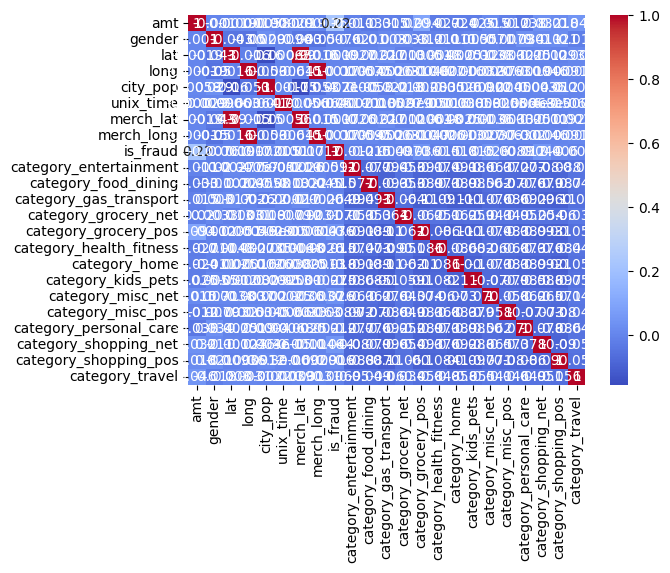

In [99]:
import seaborn as sns
correlation_matrix=trainset.corr()

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')